<a href="https://colab.research.google.com/github/azaz9026/CatVsDog_Image_Classification_Project/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 126MB/s]
100% 1.06G/1.06G [00:11<00:00, 95.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# Generators -------------------------------------------------

train_data = keras.utils.image_dataset_from_directory(
    directory = "/content/train" ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


validation_data = keras.utils.image_dataset_from_directory(
    directory = "/content/test" ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalized -----------------------------------------------

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

In [ ]:
# Create CNN Model ---------------------------------------------------------------

model = Sequential()

model.add(Conv2D(32 , kernel_size=(3, 3) , padding="valid" , activation="relu" , input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Conv2D(64 , kernel_size=(3, 3) , padding="valid" , activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Conv2D(128 , kernel_size=(3, 3) , padding="valid" , activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Flatten())

model.add(Dense(128 , activation="relu"))
model.add(Dense(64 , activation="relu"))
model.add(Dense(1 , activation="sigmoid"))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_data , epochs=10 , validation_data=validation_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 74ms/step - accuracy: 0.5936 - loss: 0.6958 - val_accuracy: 0.7306 - val_loss: 0.5354
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7610 - loss: 0.4928 - val_accuracy: 0.7946 - val_loss: 0.4599
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.8379 - loss: 0.3610 - val_accuracy: 0.7850 - val_loss: 0.5476
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - accuracy: 0.9102 - loss: 0.2176 - val_accuracy: 0.8104 - val_loss: 0.6069
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9558 - loss: 0.1175 - val_accuracy: 0.7986 - val_loss: 0.8545
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9715 - loss: 0.0786 - val_accuracy: 0.7848 - val_loss: 0.9489
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9775 - loss: 0.0644 - val_accuracy: 0.7926 - val_loss: 1.1874
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9857 - loss: 0.0428 - 

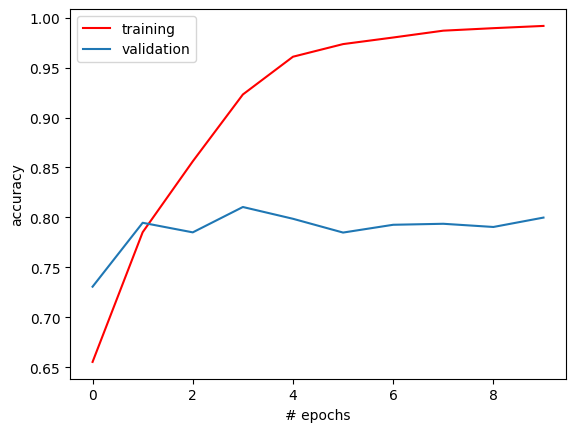

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'],'r',label='training')
plt.plot(model.history.history['val_accuracy'],label='validation')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

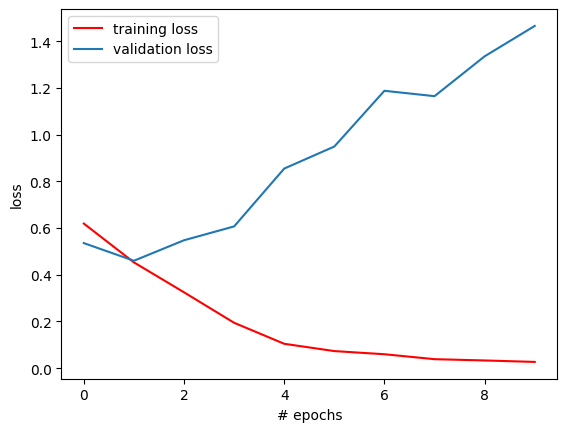

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'],'r',label='training loss')
plt.plot(model.history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import cv2

# Load the image
test_img = cv2.imread('/content/dags.jpg')  # Provide the correct path to your image

# Check if the image was loaded successfully
if test_img is None:
    raise ValueError("Image not found or unable to load. Please check the file path.")


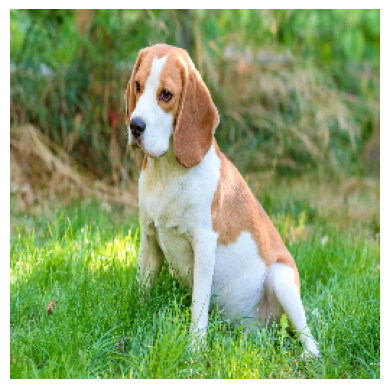

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming test_img is already loaded
test_img = cv2.resize(test_img, (256, 256))

# Reshape for model input (add batch dimension)
test_input = test_img.reshape((1, 256, 256, 3))

# Display the image
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
model.predict(test_input) # 1 for Dogs -----------

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cats.jpeg')  # Provide the correct path to your image

# Check if the image was loaded successfully
if test_img is None:
    raise ValueError("Image not found or unable to load. Please check the file path.")

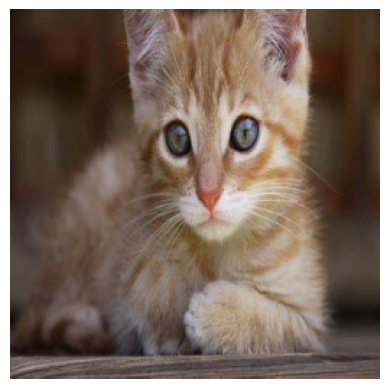

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming test_img is already loaded
test_img = cv2.resize(test_img, (256, 256))

# Reshape for model input (add batch dimension)
test_input = test_img.reshape((1, 256, 256, 3))

# Display the image
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
model.predict(test_input)  # 0 for Cats -----------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)